# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

# 0. Setup.
Pull in respective libraries to prepare the notebook environment

In [1]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git
%cd {HOME}/yolov5
%pip install -r requirements.txt

In [3]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

# 1. Inference on test image

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 61.1ms
Speed: 0.9ms pre-process, 61.1ms inference, 731.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference


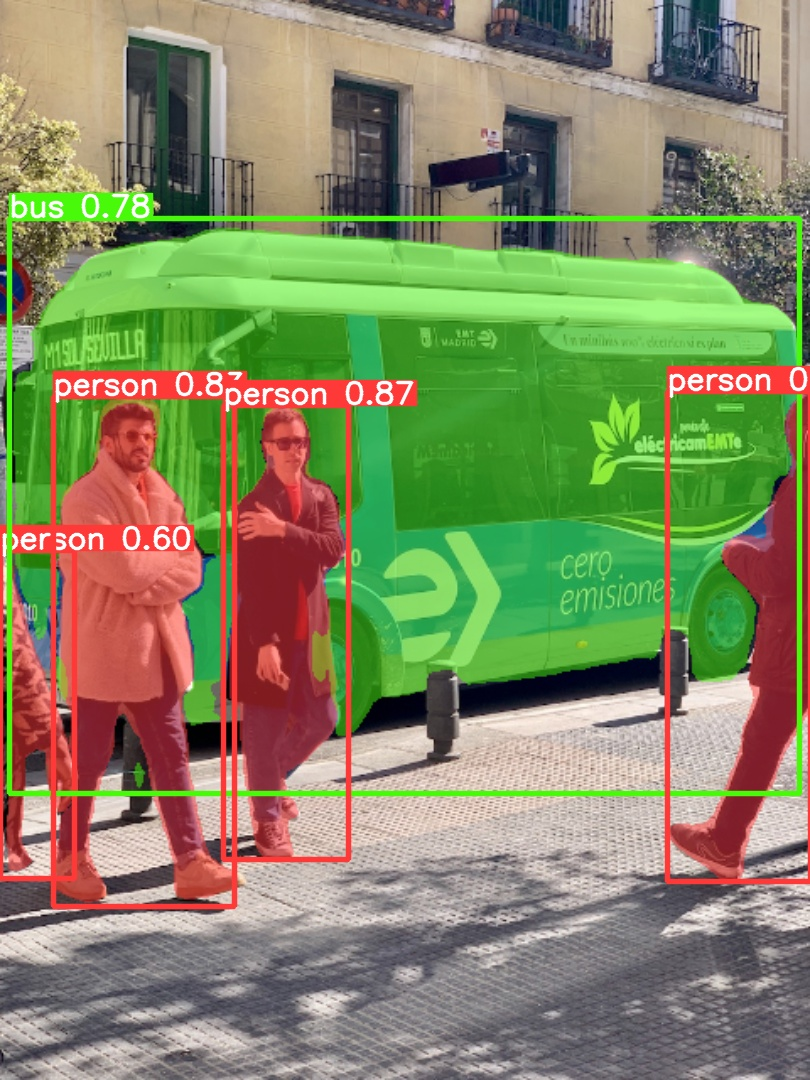

In [ ]:
# infer using segment/predict.py

%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference/bus.jpg", width=600)

### **The model correctly identified and differentiate the objects with a good confidence level.**

# 2. Infer on COCO image

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/zebra.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/yolov5/data/images/zebra.jpg: 448x640 1 zebra, 56.1ms
Speed: 0.5ms pre-process, 56.1ms inference, 554.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/coco


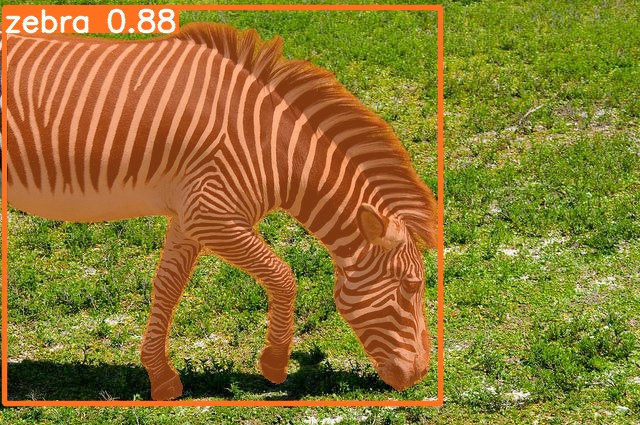

In [ ]:
#Infer using segment/predict.py
%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/zebra.jpg --name coco
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/coco/zebra.jpg", width=600)

### **The model accurately detect and predict the zebra with a high confidence level of 88%.**

## 3. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [ ]:
torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"{HOME}/tmp.zip")
!unzip -q {HOME}/tmp.zip -d {HOME}/yolov5/datasets
!rm {HOME}/tmp.zip

100%|██████████| 6.79M/6.79M [00:00<00:00, 197MB/s]


In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.9M/14.9M [00:00<00:00, 315MB/s]

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs

Dataset not found ⚠️, missing paths ['/content/datasets/coco128-seg/images/train2017']
100% 6.79M/6.79M [00:00<00:00, 292MB/s]
Dataset download success ✅ (1.8s), saved to /content/datasets
val: Scanning /content/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<00:00, 968.39it/s]
val: New cache created: /content/datasets/coco128-s

### **The model detected a total of 929 instances in 128 images. For bounding box detection, it achieved a precision of 69.3% and a recall of 65%. The mean average precision at an IoU threshold of 50% was 71.2%. Meanwhile, using wider range of IoU thresholds (50% to 95%) got a lower score of 48.8%.**

### **For instance segmentation, the model had a precision score of 67.5% and a recall of 62.6%. The mAP at 50% IoU was 66.5%, while the mAP over the wider IoU range also dropped to 40.5%.**

### **The results indicate that the model's performance decreased when considering instances with higher overlap or higher IoU threshold.**

The output shows performance metrics for the COCO-128 validation dataset.

# 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)


Create a free Roboflow account, upload your data, and label.

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

In [ ]:
%cd {HOME}/yolov5
!pip install roboflow

from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR API KEY")
rf = Roboflow(api_key="29ExFE4L5TR6YhUHTMXp")
project = rf.workspace("paul-guerrie-tang1").project("asl-poly-instance-seg")
dataset = project.version(24).download("yolov5")

In [ ]:
%cat {dataset.location}/data.yaml

names:
- A
- B
- C
- D
- E
- F
- G
- H
- I
- J
- K
- L
- M
- N
- O
- P
- Q
- R
- S
- T
- U
- V
- W
- X
- Y
- Z
nc: 26
train: ASL-Poly-Instance-Seg-24/train/images
val: ASL-Poly-Instance-Seg-24/valid/images


### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

/content/yolov5
2024-03-29 17:36:14.006842: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 17:36:14.007066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 17:36:14.114744: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/ASL-Poly-Instance-Seg-24/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, s

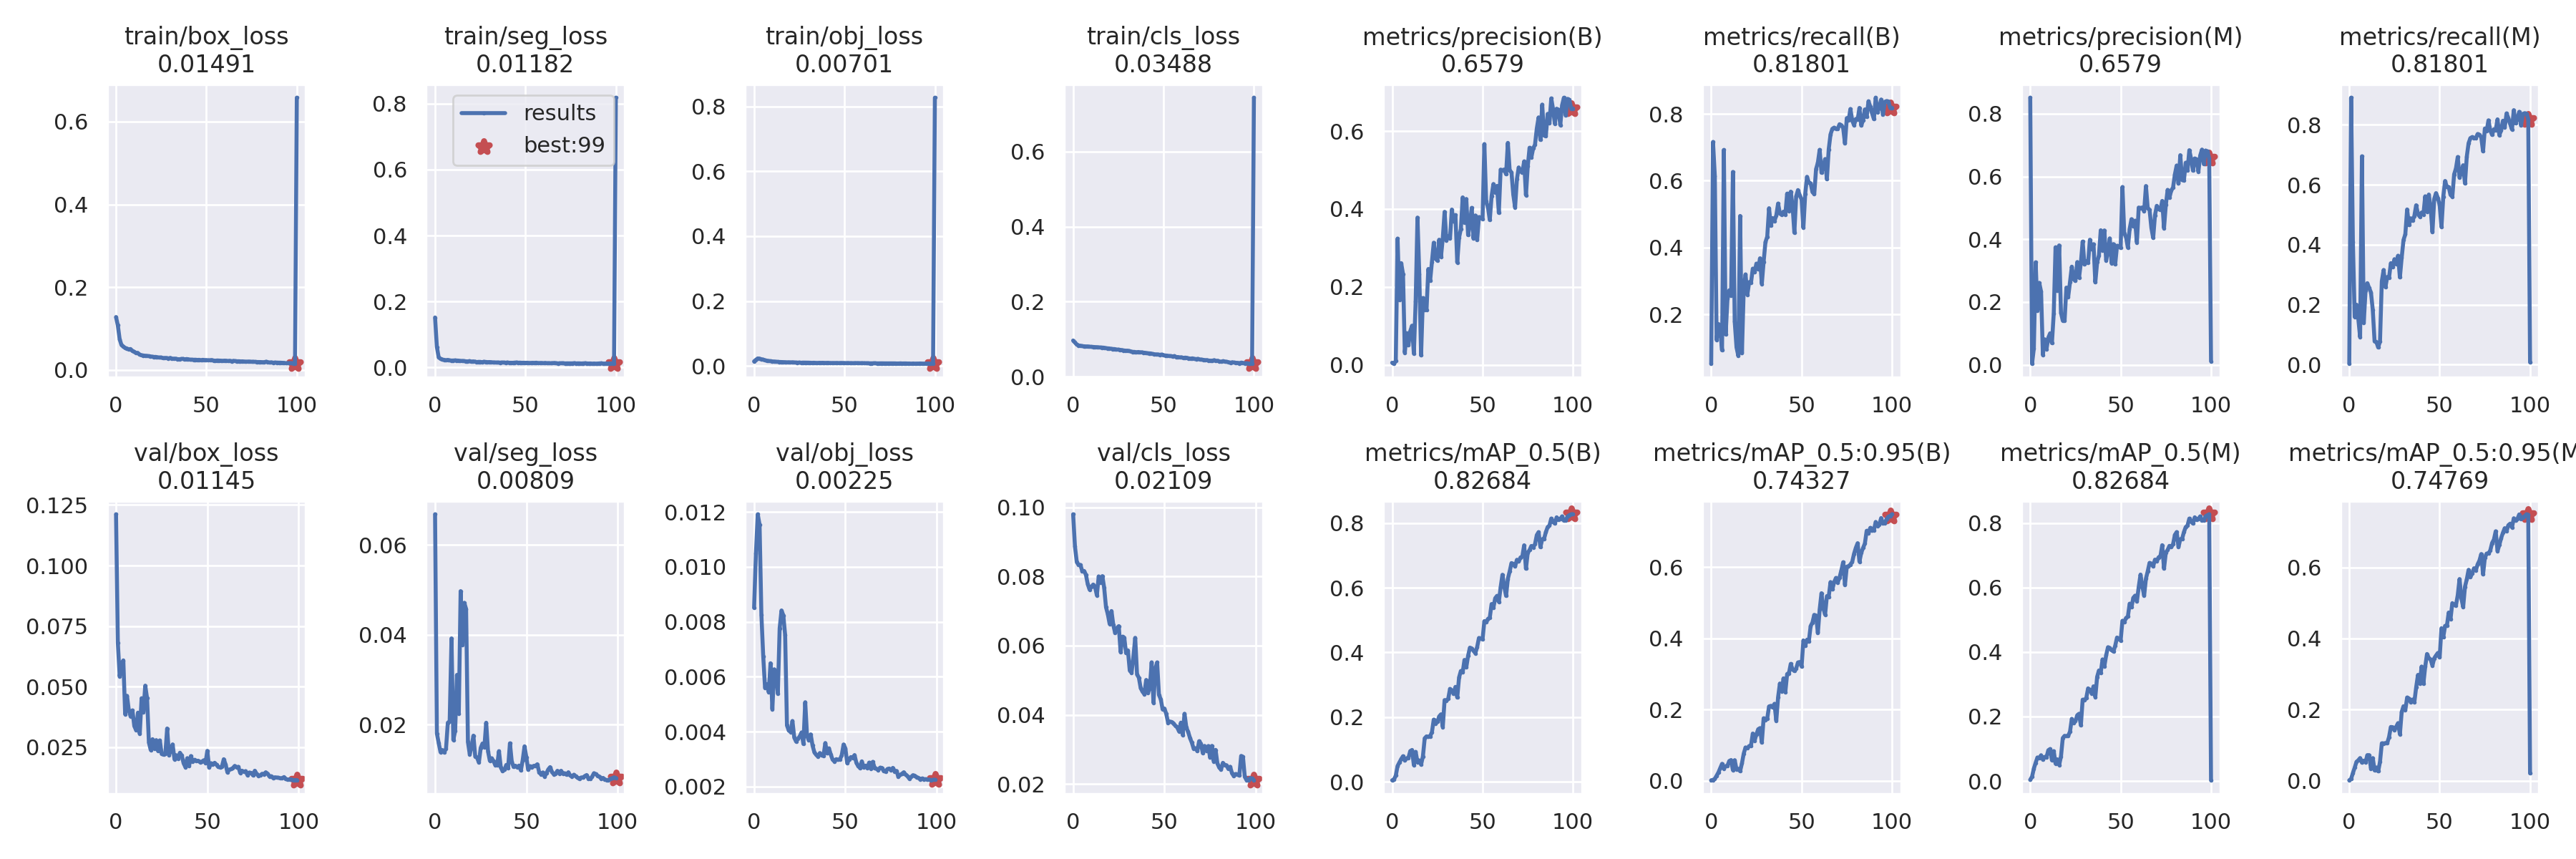

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### **The model was evaluated by determining the box loss, segmentation loss, objectness loss, and classification loss. These decreases as the number of epochs increases, but shows minimal improvement beyond 70 epochs. Box loss was used to measure the difference between predicted and ground truth bounding box, while segmentation loss for evaluating the difference between predicted segmentation masks and ground truth masks. In addition, objectness loss was computed to determine how well the model detects the presence of objects within an image, and classification loss to know the accuracy of object category predictions.**

### **Furthermore, precision, recall, mAP50, and mAP50-95 were also used to calculate the performance of the model per class. Overall, the results are somehow good in most of the classes, while other got lower scores like in letter E and R.**

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/ASL-Poly-Instance-Seg-24/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
val: Scanning /content/yolov5/ASL-Poly-Instance-Seg-24/valid/labels.cache... 334 images, 0 backgrounds, 0 corrupt: 100% 334/334 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 11/11 [00:09<00:00,  1.12it/s]
                   all        334        334

### **Based on the results, the model does a decent job with approximately 66% precision and 82% recall for detecting and locating objects accurately. However, when the results for each class was analyzed, there are some differences. For example, it's good at finding objects like B, C, and G, but performs poorly in letter E.**

### Infer With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/ASL-Poly-Instance-Seg-24/test/images/U16_jpg.rf.96e9f4f96bd6fd7e2f60d5353b883262.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
image 1/1 /content/yolov5/ASL-Poly-Instance-Seg-24/test/images/U16_jpg.rf.96e9f4f96bd6fd7e2f60d5353b883262.jpg: 320x320 1 X, 6.5ms
Speed: 0.3ms pre-process, 6.5ms inference

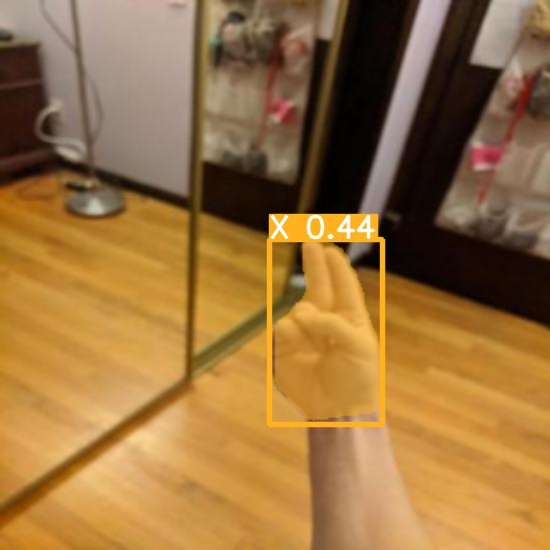

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

The image above shows the resulting prediction overlayed on the input image.

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
example_image_dir = "/content/example_images/IMG20240330024207.jpg"

In [ ]:
#Infer On Directory
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_dir} --name custom-dataset

segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/example_images/IMG20240330024207.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
image 1/1 /content/example_images/IMG20240330024207.jpg: 320x320 1 A, 6.6ms
Speed: 0.5ms pre-process, 6.6ms inference, 469.5ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/custom-dataset13


## Testing the Model With My Own Image

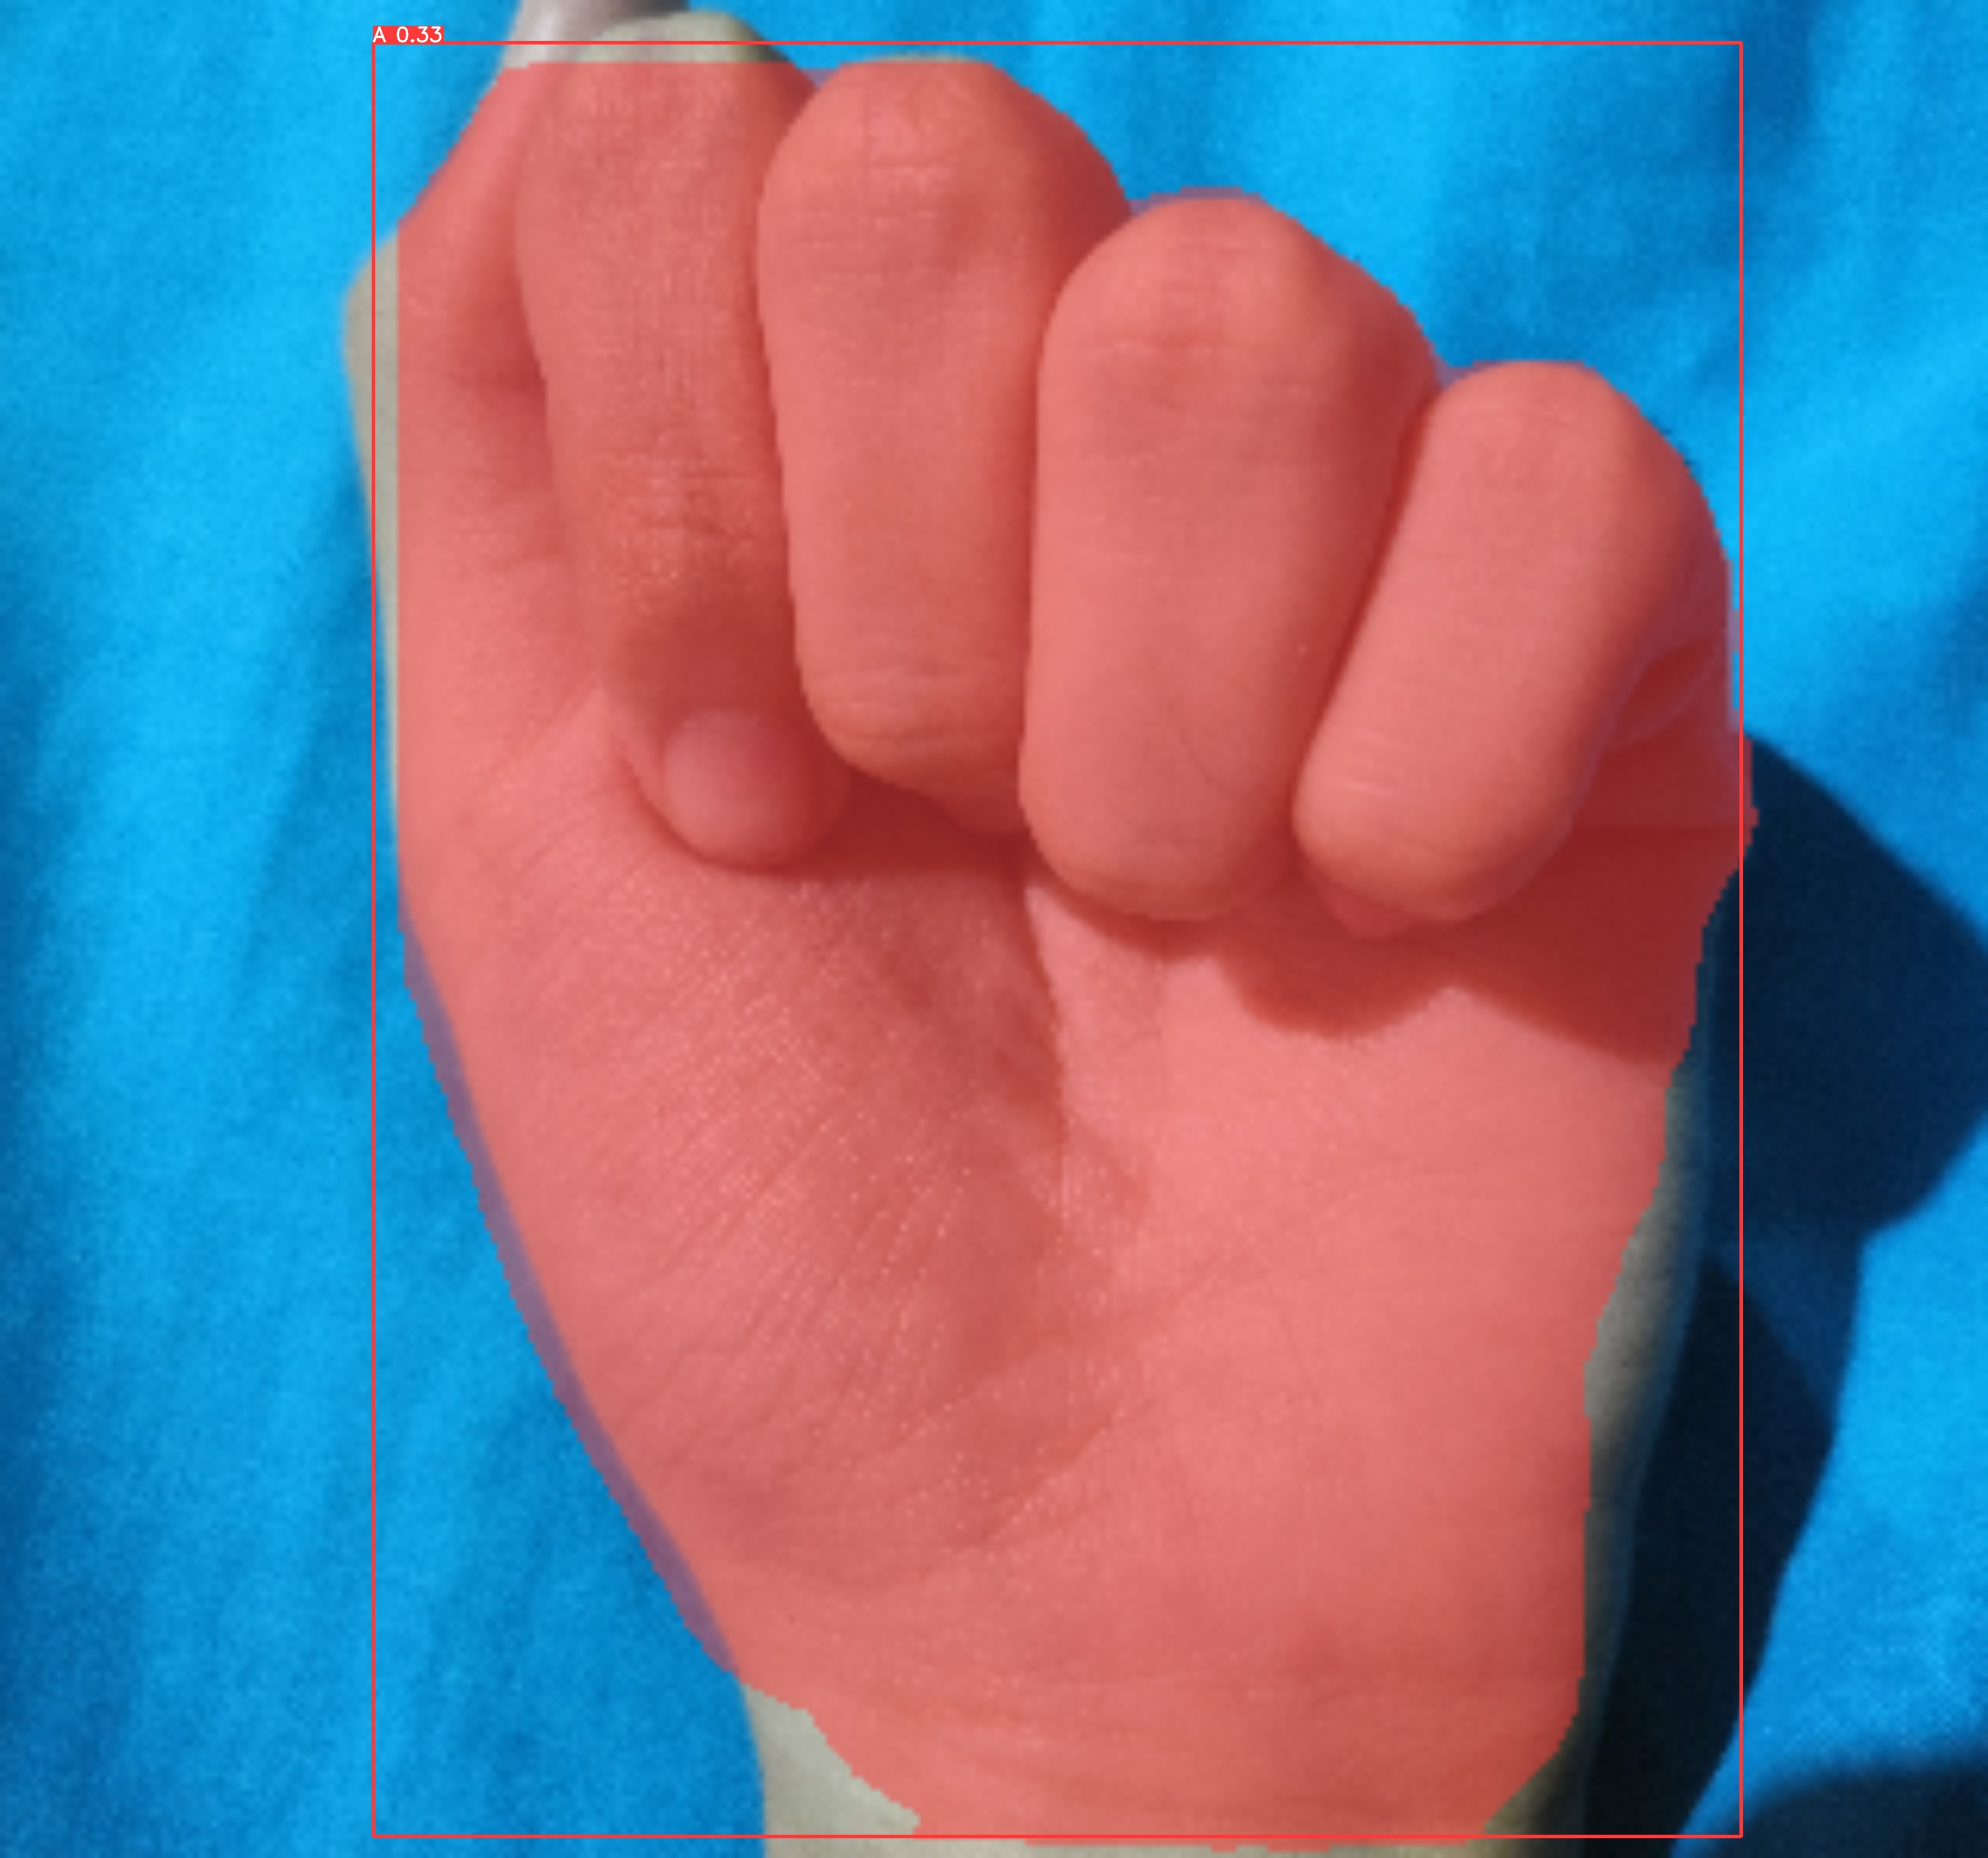

In [ ]:
prediction_image_name = "IMG20240330024207.jpg"
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset13/{prediction_image_name}", width=600)

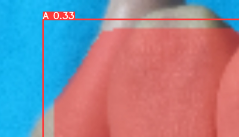

### **The model accurately detected and predicted my sign language which is letter A with the confidence level of 33%.**

----

## Supplementary: Choosing My Custom Data (Cow Dataset)

In [ ]:
%cd {HOME}/yolov5
!pip install roboflow

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="GWDiShm0W3EXuXmqD0Mz")
project = rf.workspace("mohd-abdul-ghani").project("cow-weight")
version = project.version(7)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cow-Weight-7 in yolov5pytorch:: 100%|██████████| 1510/1510 [00:00<00:00, 4573.89it/s]


In [8]:
%cat {dataset.location}/data.yaml

names:
- back-leg
- body-side
- front-leg
- head
nc: 4
roboflow:
  license: CC BY 4.0
  project: cow-weight
  url: https://universe.roboflow.com/mohd-abdul-ghani/cow-weight/dataset/7
  version: 7
  workspace: mohd-abdul-ghani
test: ../test/images
train: Cow-Weight-7/train/images
val: Cow-Weight-7/valid/images


/content/yolov5
2024-03-30 12:49:27.413089: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 12:49:27.413192: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 12:49:27.535917: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/Cow-Weight-7/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=Fal

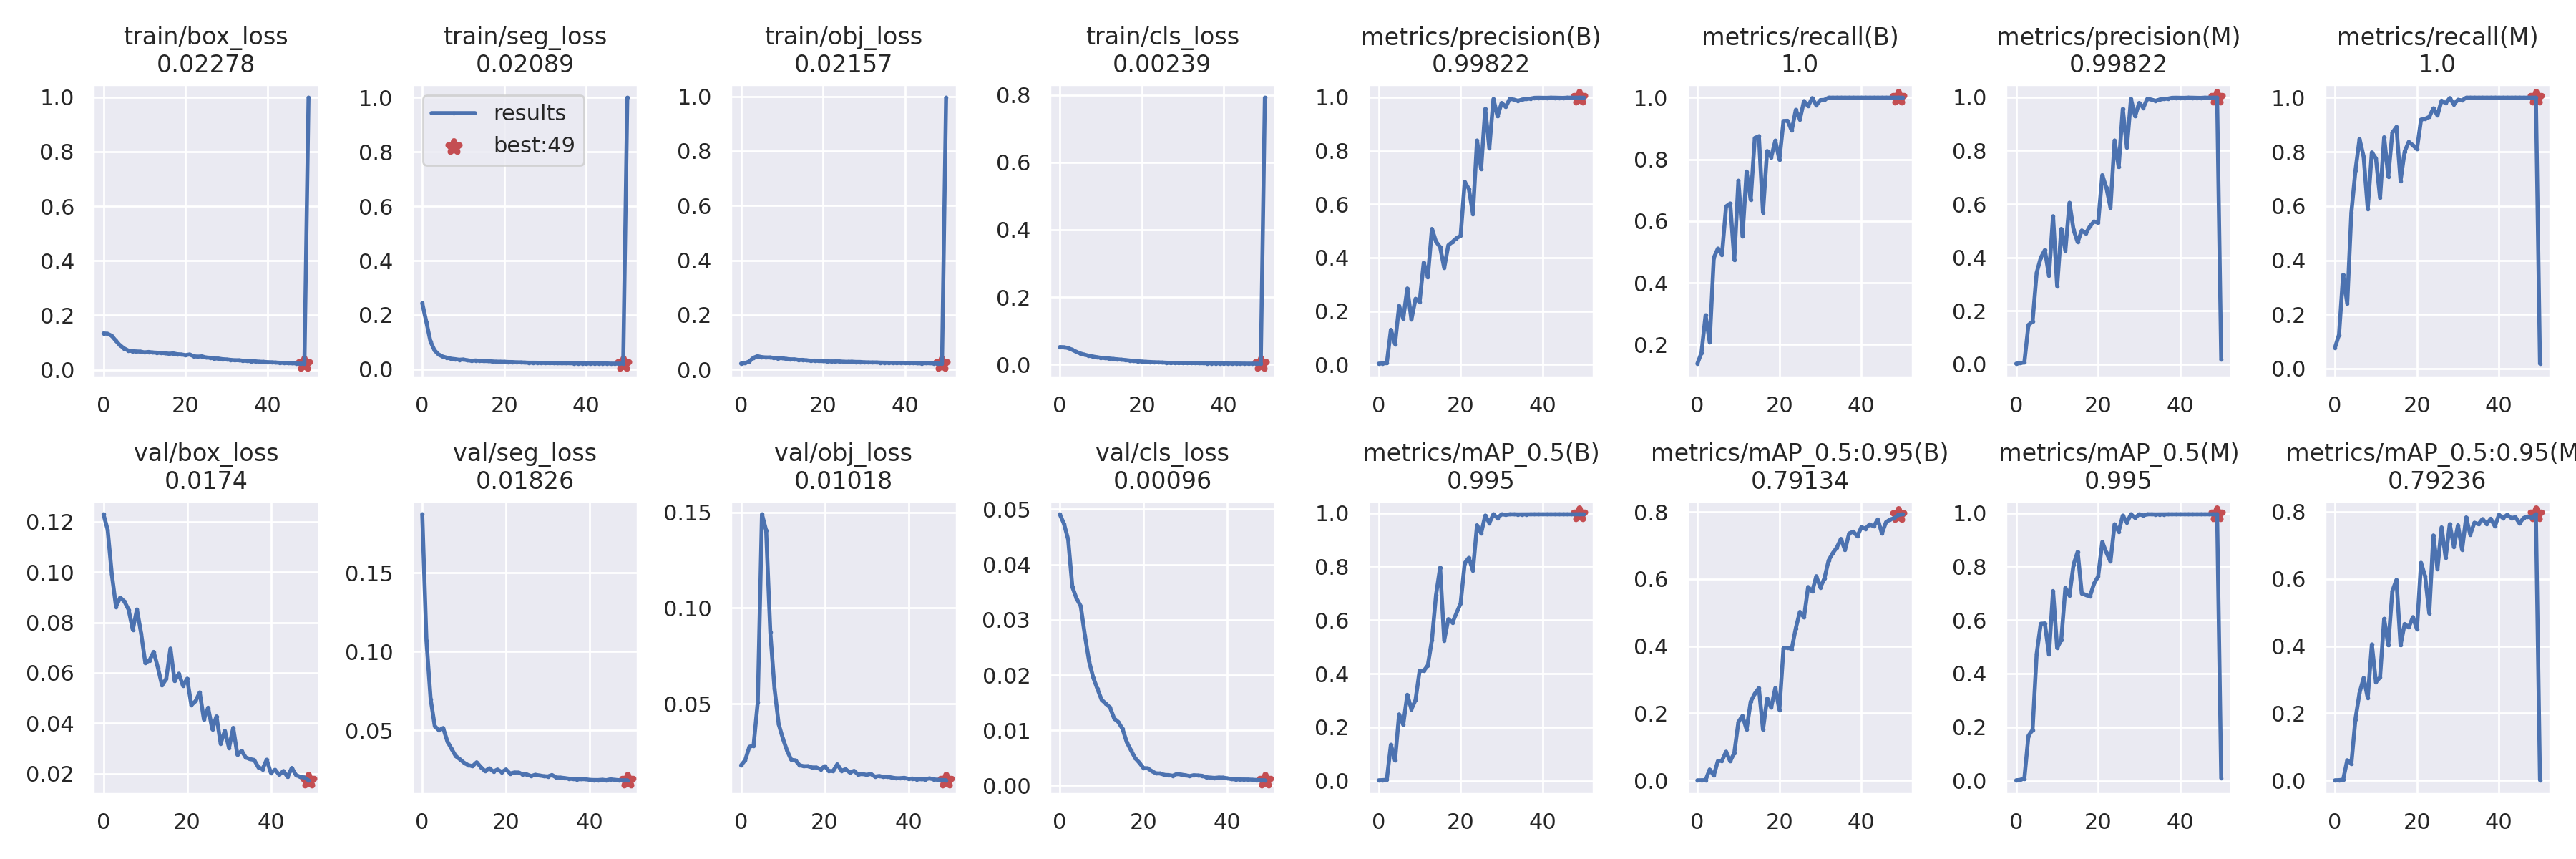

In [9]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name cow-dataset
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/cow-dataset/results.png', width=1200)

### **Training data consists of 632 images for the training and 78 images for the validation. In every epoch for both training and validation set, the loss decreases, and the precision, recall, and mean average precision increases. This indicates a good performance of the model in detecting and segmenting the objects.**

In [10]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/cow-dataset/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name cow-dataset

/content/yolov5
segment/val: data=/content/yolov5/Cow-Weight-7/data.yaml, weights=['/content/yolov5/runs/train-seg/cow-dataset/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=cow-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7406513 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/Cow-Weight-7/valid/labels.cache... 78 images, 0 backgrounds, 0 corrupt: 100% 78/78 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:05<00:00,  1.76s/it]
                   all         78        312      0.998          1      0.995  

### **For the validation, the precision for each class is all beyond 99% while the recall achieved 100%. Moreover, the maP50 scores are also beyond 99% while the maP50 -95 are ranging from 77-91%. It shows that the model excels more in detecting objects with moderate overlap (mAP50) while also demonstrating a somehow good performance with mAP50-95.**

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/cow-dataset/weights/best.pt'], source=/content/yolov5/Cow-Weight-7/test/images/103-0_s_184_3-0_F_jpg.rf.01cc93da91430248c8e65cc39ef7b3e0.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=cow-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7406513 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Cow-Weight-7/test/images/103-0_s_184_3-0_F_jpg.rf.01cc93da91430248c8e65cc39ef7b3e0.jpg: 320x320 1 back-leg, 1 body-side, 1 front-leg, 1 head, 6.4ms
Sp

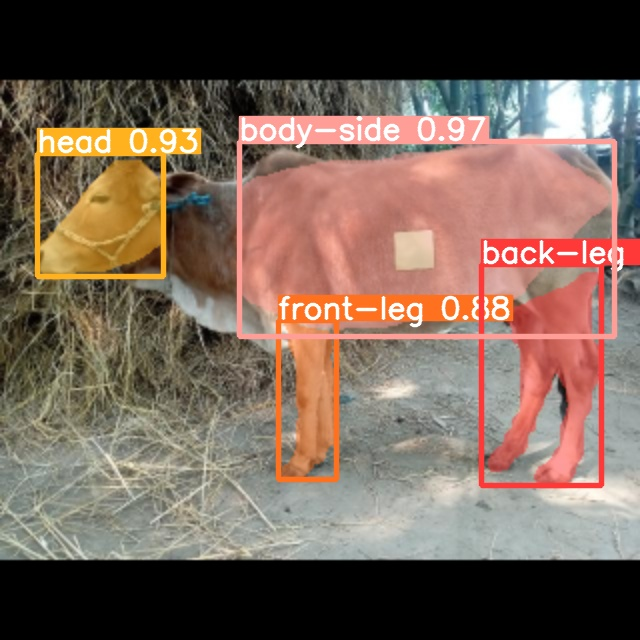

In [14]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/cow-dataset/weights/best.pt --source {example_image_path} --name cow-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/cow-dataset/{example_image_name}", width=600)

### **The image above shows that the model accurately detect and predict the objects with a high confidence level.**

## Trying Cow Images from the Internet

segment/predict: weights=['/content/yolov5/runs/train-seg/cow-dataset/weights/best.pt'], source=/content/cow3.png, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=cow-dataset-predict3, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7406513 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/cow3.png: 224x320 1 back-leg, 1 body-side, 1 front-leg, 1 head, 52.5ms
Speed: 0.3ms pre-process, 52.5ms inference, 514.9ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/cow-dataset-predict3


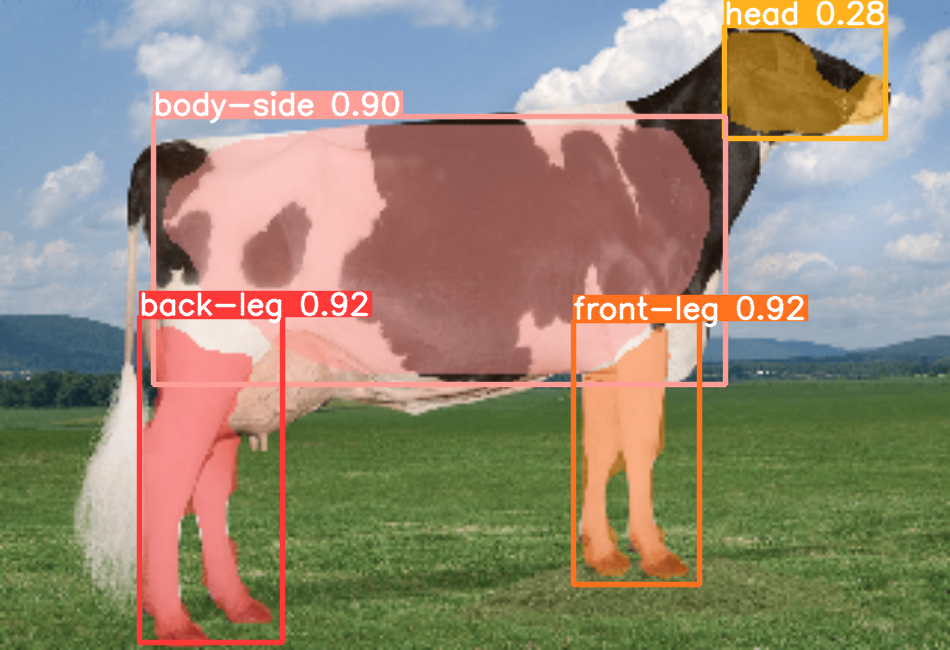

In [22]:
example_image = "/content/cow3.png"
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/cow-dataset/weights/best.pt --source {example_image} --name cow-dataset-predict3
prediction_image_name = "cow3.png"
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/cow-dataset-predict3/{prediction_image_name}", width=600)

segment/predict: weights=['/content/yolov5/runs/train-seg/cow-dataset/weights/best.pt'], source=/content/cow2.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=cow-dataset-predict2, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7406513 parameters, 0 gradients, 25.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/cow2.jpg: 256x320 1 back-leg, 1 body-side, 1 front-leg, 1 head, 83.5ms
Speed: 0.4ms pre-process, 83.5ms inference, 843.1ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/cow-datase

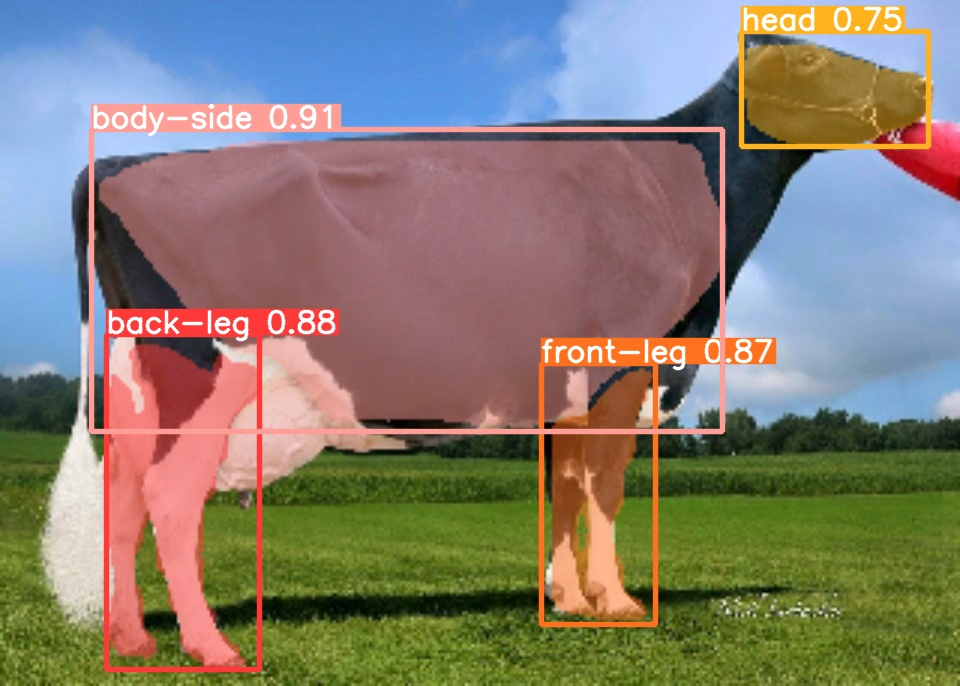

In [21]:
example_image = "/content/cow2.jpg"
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/cow-dataset/weights/best.pt --source {example_image} --name cow-dataset-predict2
prediction_image_name = "cow2.jpg"
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/cow-dataset-predict2/{prediction_image_name}", width=600)

segment/predict: weights=['/content/yolov5/runs/train-seg/cow-dataset/weights/best.pt'], source=/content/cow4.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=cow-dataset-predict6, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7406513 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/cow4.jpg: 288x320 1 back-leg, 1 body-side, 1 front-leg, 1 head, 52.1ms
Speed: 0.3ms pre-process, 52.1ms inference, 451.9ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/cow-dataset-predict6


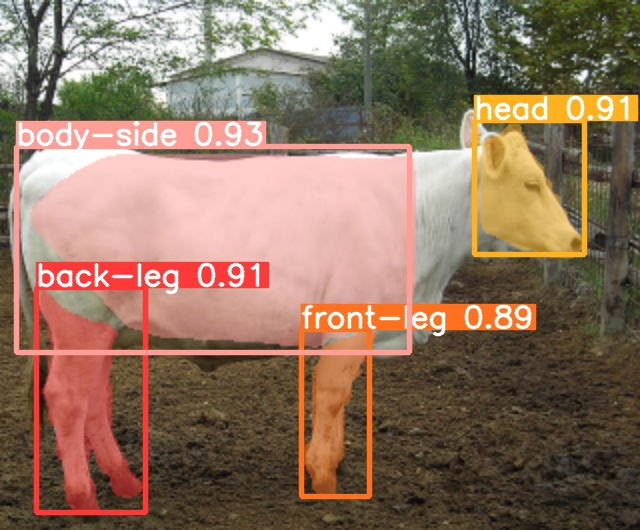

In [26]:
example_image = "/content/cow4.jpg"
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/cow-dataset/weights/best.pt --source {example_image} --name cow-dataset-predict6
prediction_image_name = "cow4.jpg"
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/cow-dataset-predict6/{prediction_image_name}", width=600)

### **Upon choosing the images from the internet that are not included in training the data, the model still shows a good performance in detecting and predicting the object. The confidence level are also high in each class which demonstrates model's reliability even in unseen data.**

---

## Conclusion

### **In this activity, I learned how to implement YOLOv5 for instance segmentation tasks in custom dataset. The training process involved evaluating several loss metric to know how well the model learned the different aspects of segmentation. Moreover, metrics like precision, recall, mean average precision at IoU thresholds of 0.5 and 0.50-0.95 for both bounding boxes and masks are also used to show the performance of the model. For the cow dataset, the model performs well since it consistently improve during training. Then, it achieved high precision and recall in validation. Even when tested on new images from the internet, the model still showed good performance and confidence in its predictions.**